In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
data=pd.read_csv("titanic.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Drop columns which are not useful
data=data.drop(['PassengerId','Name','Ticket','Cabin'], axis=1)

#Fill the missing values with the median of the given data
# Fill missing values
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

C:\Users\sriram\AppData\Local\Temp\ipykernel_12256\3028048320.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\sriram\AppData\Local\Temp\ipykernel_12256\3028048320.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [5]:
#Encoding the categorical features
data['Sex']=data['Sex'].map({'male':0,'female':1})
data=pd.get_dummies(data, columns=['Embarked'],drop_first=True)


In [6]:
#Normailze certain features
data['Age'] = (data['Age'] - data['Age'].mean()) / data['Age'].std()
data['Fare'] = (data['Fare'] - data['Fare'].mean()) / data['Fare'].std()

In [7]:
# Separate features and target
X = data.drop('Survived', axis=1).values.astype(np.float64)  # Ensure X is float
y = data['Survived'].values.astype(int)  # Ensure y is int



In [8]:
# Split data into training and test sets (80-20 split)
split_index = int(0.8 * len(X))
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

In [9]:
# Logistic Regression Implementation
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def sigmoid(self, z):
        z = np.asarray(z, dtype=np.float64)  # Ensure z is of type float
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        num_samples, num_features = X.shape
        self.weights = np.zeros(num_features, dtype=np.float64)  # Ensure weights are float
        self.bias = 0.0  # Initialize bias as float

        for _ in range(self.num_iterations):
            linear_model = np.dot(X, self.weights) + self.bias
            y_predicted = self.sigmoid(linear_model)

            # Gradient Descent
            dw = (1 / num_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / num_samples) * np.sum(y_predicted - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        y_predicted = self.sigmoid(linear_model)
        y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_class)

In [10]:
#Train the model
model = LogisticRegression(learning_rate=0.1, num_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
def accuracy(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)

accuracy_score = accuracy(y_test, y_pred)
print(f'Accuracy: {accuracy_score:.4f}')


Accuracy: 0.8324


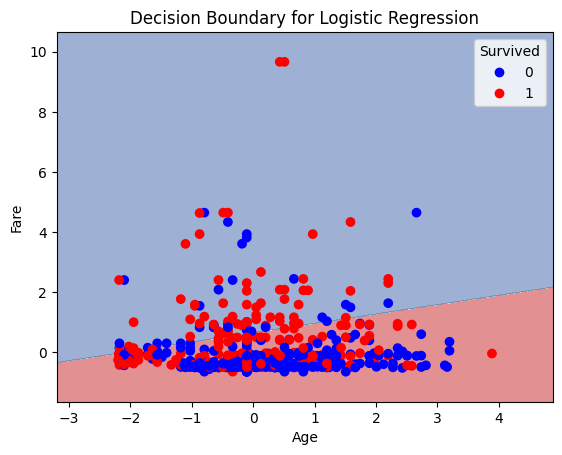

   Survived  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked_Q  \
0         0       3    0 -0.565419      1      0 -0.502163       False   
1         1       1    1  0.663488      1      0  0.786404       False   
2         1       3    1 -0.258192      0      0 -0.488580       False   
3         1       1    1  0.433068      1      0  0.420494       False   
4         0       3    0  0.433068      0      0 -0.486064       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


In [13]:
# Visualize decision boundary for two features (Age and Fare)
def plot_decision_boundary(X, y, model):
    # Set min and max values for the features for the grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    
    # Use model to predict over the grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=plt.cm.RdYlBu)
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.legend(*scatter.legend_elements(), title="Survived")
    plt.title('Decision Boundary for Logistic Regression')
    plt.show()

# Select only 'Age' and 'Fare' for decision boundary visualization
X_train_subset = X_train[:, [2, 5]]  # Assuming Age and Fare are in these columns
model.fit(X_train_subset, y_train)  # Train on selected features
plot_decision_boundary(X_train_subset, y_train, model)
# Convert NumPy array to DataFrame
data_df = pd.DataFrame(data)

# Now you can use head()
print(data_df.head())